In [12]:
# !pip install yfinance==0.1.62

In [1]:
import tensorflow as tf
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# df=pd.read_csv("BTC-USD.csv")
# df.tail(5)


In [3]:
import yfinance as yf

stock = yf.Ticker("BTC-USD")
hist = stock.history(period="5y")
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,21664706865,0,0
2021-07-25,34290.292969,35364.925781,33881.835938,35350.187500,20856685287,0,0
2021-07-26,35384.031250,40499.675781,35287.312500,37337.535156,51022126212,0,0
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,35097370560,0,0
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,38702404695,0,0
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,27167146027,0,0
2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,33072782960,0,0
2021-07-31,42196.304688,42231.449219,41110.832031,41626.195312,25802845343,0,0
2021-08-01,41460.843750,42541.679688,39540.941406,39974.894531,26688438115,0,0


In [4]:
# import yfinance as yf
# 
# stock = yf.Ticker("ETH-USD")
# hist = stock.history(period="5y")
# hist.tail(10)

In [5]:
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set = df.iloc[:n, 1:2].values
test_set = df.iloc[n:, 1:2].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
### model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 14s 85ms/step - loss: 0.0315
Epoch 2/50
45/45 [==============================] - 4s 88ms/step - loss: 0.0084
Epoch 3/50
45/45 [==============================] - 4s 90ms/step - loss: 0.0092
Epoch 4/50
45/45 [==============================] - 4s 96ms/step - loss: 0.0063
Epoch 5/50
45/45 [==============================] - 4s 95ms/step - loss: 0.0057
Epoch 6/50
45/45 [==============================] - 4s 88ms/step - loss: 0.0087
Epoch 7/50
45/45 [==============================] - 4s 85ms/step - loss: 0.0060
Epoch 8/50
45/45 [==============================] - 4s 86ms/step - loss: 0.0050
Epoch 9/50
45/45 [==============================] - 4s 85ms/step - loss: 0.0049
Epoch 10/50
45/45 [==============================] - 4s 87ms/step - loss: 0.0051
Epoch 11/50
45/45 [==============================] - 4s 84ms/step - loss: 0.0056
Epoch 12/50
45/45 [==============================] - 4s 87ms/step - loss: 0.0052
Epoch 13/50
45/45 [=================

In [20]:
# model.save("BTC-predict.h5")
# model.save("ETH-predict.h5")

In [7]:
from keras.models import load_model

model = load_model("BTC-predict.h5")
# model = load_model("ETH-predict.h5")

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 30, 100)           40800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 50)            30200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [9]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(365, 30, 1)


In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [12]:
df['Date']=df.index

In [13]:
df=df.reset_index(drop=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,606.396973,612.848022,531.333984,547.465027,330932992,0,0,2016-08-02
1,548.656006,573.359985,541.546997,566.354980,207982000,0,0,2016-08-03
2,566.328979,579.495972,565.776978,578.289001,125292000,0,0,2016-08-04
3,578.281006,578.281006,569.981995,575.043030,66127900,0,0,2016-08-05
4,575.030029,588.395996,569.468994,587.778015,80797296,0,0,2016-08-06
...,...,...,...,...,...,...,...,...
1818,39995.453125,40593.070312,39352.058594,40008.421875,27167146027,0,0,2021-07-29
1819,40027.484375,42235.546875,38397.355469,42235.546875,33072782960,0,0,2021-07-30
1820,42196.304688,42231.449219,41110.832031,41626.195312,25802845343,0,0,2021-07-31
1821,41460.843750,42541.679688,39540.941406,39974.894531,26688438115,0,0,2021-08-01


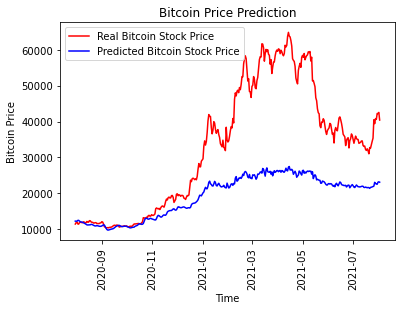

In [14]:
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Bitcoin Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Get tomorrow's predicted price

In [30]:
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
1813,35284.343750,35284.343750,33213.660156,33746.003906,26721554282,0,0,2021-07-05
1814,33723.507812,35038.535156,33599.917969,34235.195312,26501259870,0,0,2021-07-06
1815,34225.679688,34997.664062,33839.289062,33855.328125,24796027477,0,0,2021-07-07
1816,33889.605469,33907.906250,32133.183594,32877.371094,29910396946,0,0,2021-07-08
1817,32861.671875,34042.292969,32318.880859,33798.011719,27436021028,0,0,2021-07-09
1818,33811.242188,34209.070312,33116.011719,33520.519531,22971873468,0,0,2021-07-10
1819,33509.078125,34584.703125,33346.738281,34240.187500,20108729370,0,0,2021-07-11
1820,34254.015625,34592.156250,32697.308594,33155.847656,24321499537,0,0,2021-07-12
1821,33125.468750,33327.101562,32261.419922,32702.025391,19120856669,0,0,2021-07-13
1822,32707.240234,32744.906250,31748.269531,32497.494141,22165088256,0,0,2021-07-14


In [31]:
## Add a dummy row at the end. This will not be used to predict. 

df.loc[len(df)]=df.loc[len(df)-1]

In [32]:
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
1814,33723.507812,35038.535156,33599.917969,34235.195312,26501259870,0,0,2021-07-06
1815,34225.679688,34997.664062,33839.289062,33855.328125,24796027477,0,0,2021-07-07
1816,33889.605469,33907.906250,32133.183594,32877.371094,29910396946,0,0,2021-07-08
1817,32861.671875,34042.292969,32318.880859,33798.011719,27436021028,0,0,2021-07-09
1818,33811.242188,34209.070312,33116.011719,33520.519531,22971873468,0,0,2021-07-10
1819,33509.078125,34584.703125,33346.738281,34240.187500,20108729370,0,0,2021-07-11
1820,34254.015625,34592.156250,32697.308594,33155.847656,24321499537,0,0,2021-07-12
1821,33125.468750,33327.101562,32261.419922,32702.025391,19120856669,0,0,2021-07-13
1822,32707.240234,32744.906250,31748.269531,32497.494141,22165088256,0,0,2021-07-14
1823,32707.240234,32744.906250,31748.269531,32497.494141,22165088256,0,0,2021-07-14


In [33]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [34]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(366, 30, 1)


In [35]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
float(predicted_stock_price[-1])

21548.5546875

In [46]:
print("Tomorrow's predicted price = $", float(predicted_stock_price[-1]))

Tomorrow's predicted price = $ 23544.08984375
